# 1. Modelos en Pyomo <img src="fcfm.png" style="width: 80px;" style="float: right;"  align="right"  margin-right= "50px"/>

031 E2024 Investigación de Operaciones

Dr. Luis Ángel Gutiérrez Rodríguez

Ismael Sandoval Aguilar 

11 de Febrero de 2024

#### **Problema 9**
Tres productos son fabricados en una máquina. El tiempo de preparación de cada producto es de 2, 
3 y 4 minutos respectivamente, y el tiempo de proceso de 3, 2 y 1 minutos. El beneficio aportado 
por cada producto es respectivamente de 12, 10 y 15 euros. Se dispone de 100 minutos de máquina 
y 200 para la preparación de la misma. Determine el número óptimo de unidades a fabricar de cada 
artículo. 

#### Modelación del Problema
Definición de las variables de decisión:

$x_i$: Número de unidades del producto $i$ a fabricar tal que $i \in \{1,2,3\}$.

Función objetivo:

Maximizar $Z = 12x_1 + 10x_2 + 15x_3$

Sujeto a las restricciones:

$2x_1 + 3x_2 + 4x_3 \leq 200$ \
$3x_1 + 2x_2 + x_3 \leq 100$ \
$x_i \geq 0$ 

#### Solución Computacional 

In [15]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

In [16]:
# Model and variables creation
model = pyo.ConcreteModel()
model.x = pyo.Var([1,2,3], domain=pyo.NonNegativeReals)

# Objective function
model.OBJ = pyo.Objective(expr = 12*model.x[1] + 10*model.x[2] + 15*model.x[3], sense = pyo.maximize)

# Model constraints 
model.Constraint1 = pyo.Constraint(expr = 2*model.x[1] + 3*model.x[2] + 4*model.x[3] <= 200)
model.Constraint2 = pyo.Constraint(expr = 3*model.x[1] + 2*model.x[2] + model.x[3] <= 100)

In [17]:
results_9 = pyo.SolverFactory('glpk').solve(model)

print("\nResultados: \n");
print('Z =', model.OBJ())
print("x_1 =", model.x[1]())
print("x_2 =", model.x[2]())
print("x_3 =", model.x[3]())


Resultados: 

Z = 840.0
x_1 = 20.0
x_2 = 0.0
x_3 = 40.0


#### **Problema 2**
Una empresa elabora tres tipos de bebidas utilizando zumo de piña y zumo de melocotón. El dueño
de la empresa ha comprado 1.500 litros de zumo de piña y 2.000 de zumo de melocotón. Los litros
de zumo requeridos en la fabricación de cada bebida vienen dados en la tabla siguiente.

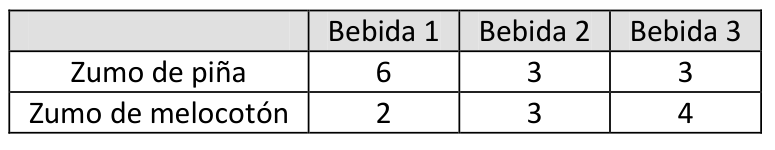

El precio de venta de cada bebida es 15 euros el litro. El coste del zumo de piña es de 1 euro el litro
y 2 euros el litro de zumo de melocotón. Se conoce que la demanda de bebidas asciende a 400
litros.

#### Modelación del Problema
Definición de las variables de decisión:

$x_i$: Litros de bebida fabricada $i$ tal que $i \in \{1,2,3\}$.

Función objetivo:

Maximizar $Z = 5x_1 + 6x_2 + 4x_3$

Sujeto a las restricciones:

$6x_1 + 3x_2 + 3x_3 \leq 1500$ \
$2x_1 + 3x_2 + 4x_3 \leq 2000$ \
$x_1 + x_2 + x_3 \geq 400$ \
$x_i \geq 0$ 

#### Solución Computacional

In [18]:
# Model and variables creation
model = pyo.ConcreteModel()
model.x = pyo.Var([1,2,3], domain=pyo.NonNegativeReals)

# Objective function
model.OBJ = pyo.Objective(expr = 5*model.x[1] + 6*model.x[2] + 4*model.x[3], sense = pyo.maximize)

# Model constraints 
model.Constraint1 = pyo.Constraint(expr = 6*model.x[1] + 3*model.x[2] + 3*model.x[3] <= 1500)
model.Constraint2 = pyo.Constraint(expr = 2*model.x[1] + 3*model.x[2] + 4*model.x[3] <= 2000)
model.Constraint3 = pyo.Constraint(expr = model.x[1] + model.x[2] + model.x[3] >= 400)

In [19]:
results_2 = pyo.SolverFactory('glpk').solve(model)

print("\nResultados: \n");
print('Z =', model.OBJ())
print("x_1 =", model.x[1]())
print("x_2 =", model.x[2]())
print("x_3 =", model.x[3]())


Resultados: 

Z = 3000.0
x_1 = 0.0
x_2 = 500.0
x_3 = 0.0


#### **Problema 4**
Una empresa está estudiando llevar a cabo una campaña publicitaria, para ello dispone de
1,000,000 de euros. Puede difundir sus anuncios en dos canales publicitarios distintos, el primero de
ellos cobra 15,000 euros cada vez que emite un anuncio, mientras que el segundo cobra el doble. La
probabilidad de que un anuncio del primer canal sea visto es del 30%, mientras que del segundo es
del 70%. Como mínimo deben emitirse 26 anuncios en el primer canal y 13 en el segundo.

#### Modelación del Problema
Definición de las variables de decisión:

$x_i$: Número de anuncios a emitir en el canal $i$ tal que $i \in \{1,2,3\}$.

Función objetivo:

Maximizar $Z = 0.3x_1 + 0.7x_2$

Sujeto a las restricciones:

$1500x_1 + 3000x_2 \leq 1000000$ \
$x_1 \geq 26$ \
$x_2 \geq 13$ \
$x_i \geq 0$ 

#### Solución Computacional


In [20]:
# Model and variables creation
model = pyo.ConcreteModel()
model.x = pyo.Var([1,2], domain=pyo.NonNegativeReals)

# Objective function
model.OBJ = pyo.Objective(expr = 0.3*model.x[1] + 0.7*model.x[2], sense = pyo.maximize)

# Model constraints 
model.Constraint1 = pyo.Constraint(expr = 1500*model.x[1] + 3000*model.x[2] <= 1000000)
model.Constraint2 = pyo.Constraint(expr = model.x[1] >= 26)
model.Constraint3 = pyo.Constraint(expr = model.x[2] >= 13)

In [21]:
results_2 = pyo.SolverFactory('glpk').solve(model)

print("\nResultados: \n");
print('Z =', model.OBJ())
print("x_1 =", model.x[1]())
print("x_2 =", model.x[2]())


Resultados: 

Z = 232.03333333333308
x_1 = 26.0
x_2 = 320.333333333333
